# Predictor de responsabilidad de siniestros viales

Nombre: Alvaro Concha

---
### Objetivos
1. Realizar el análisis exploratorio de los datos para determinar qué campos además de la
descripción tienen importancia para determinar la responsabilidad del hecho.

2. Realizar un modelo que dada las características seleccionadas determine la
responsabilidad del hecho.

3. Realizar un workflow del proceso realizado en los puntos anteriores donde también se
reporten los próximos pasos a seguir al momento de disponibilizar dicho modelo al
cliente.

4. Disponibilizar en un repositorio todo el desarrollo con un esquema de la estructura
deseada del proyecto y la explicación de su abordaje en el “README.md” o en un
Notebook junto con el resto de los puntos.


---
### Atributos originales

Id_evento: es un código identificador

Id_reclamo_evento: es un código identificador

Id_reclamo: es un código identificador

TIPO_RECLAMO: es un código identificador

FECHA_SINI: fecha en la que ocurrió el siniestro

LUGAR_OCURRENCIA: dirección de ocurrencia del siniestro

COD_POST_OCURRENCIA: código postal del lugar donde ocurre el siniestro

ESTADO_CIVIL: estado civil del asegurado

FECHA_NAC_ASEG: fecha de nacimiento del asegurado

SEXO: sexo del asegurado

OCUPACION_ASEG: ocupación codificada del asegurado

MODELO_VEHICULO: año de emisión del vehículo del asegurado

FECHA_PROCESO: fecha en la que se proceso la designación del asegurado

TIPO_ADMINISTRACION: determina la responsabilidad inicial del asegurado

DESCRIP_HECHO: descripción del siniestro en cuestión

HORA_SINI: hora en la que ocurre el siniestro

LATITUD

LONGITUD

TIPO_ADMINISTRACION_FIN: determina la responsabilidad final del asegurado



---
### Setup

In [1]:
# Instalar librerías y paquetes
# %pip install -r requirements.txt

In [2]:
# Importar librerías y paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

np.random.seed(42)

/home/alvaro/.local/lib/python3.8/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout
from keras.regularizers import l2
from scikeras.wrappers import KerasClassifier
import umap
import hdbscan

2022-08-27 18:49:34.446589: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-27 18:49:34.446613: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
from stanza import Pipeline
from nltk.tokenize import RegexpTokenizer
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [4]:
# Un vistazo de las primeras líneas de "siniestros.csv"
with open("siniestros.csv", "r") as file:
    for _ in range(5):
        line = file.readline()
        print(line)

,id_evento,id_reclamo_evento,id_reclamo,TIPO_RECLAMO,FECHA_SINI,LUGAR_OCURRENCIA,COD_POST_OCURRENCIA,ESTADO_CIVIL,FECHA_NAC_ASEG,SEXO,OCUPACION_ASEG,MODELO_VEHICULO,FECHA_PROCESO,TIPO_ADMINISTRACION,DESCRIP_HECHO,HORA_SINI,LATITUD,LONGITUD,TIPO_ADMINISTRACION_FIN

0,1,1,1,NO TRANSPORTADO,1/1/2019,CEBALLOS 5300,8300001,SO,10/27/1976,M,2.0,2007.0,1/31/2019,A,"VH CIRCULANDO POR CALLE CEBALLOS 5300 (NEUQUEN - NEUQUEN CAP) CUANDO UN TERCERO QUE CIRCULABA POR LA MISMA EN SENTIDO CONTRARIO INVADE EL CARRIL DEL ASEGURADO, ESTE MANIOBRA PARA EVITAR COLISION FRONTAL Y ES EMBESTIDO EN LATERAL IZQUIERDO CON LA PARTE FRONTAL DEL TERCERO. AMBOS VH SE DESPLAZAN SIN NUEVAS COLISIONES. CON LESIONADOS, INTERVIENE POLICIA Y AMBULANCIA.",01:30,,,B

1,1,2,2,NO TRANSPORTADO,1/1/2019,CEBALLOS 5300,8300001,SO,10/27/1976,M,2.0,2007.0,1/31/2019,A,"VH CIRCULANDO POR CALLE CEBALLOS 5300 (NEUQUEN - NEUQUEN CAP) CUANDO UN TERCERO QUE CIRCULABA POR LA MISMA EN SENTIDO CONTRARIO INVADE EL CARRIL DEL ASEGURADO, ESTE M

In [5]:
# Cargar los datos
data = pd.read_csv("siniestros.csv", sep=",", header=0)
data = data.drop(columns=data.columns[0])
data.head()

,id_evento,id_reclamo_evento,id_reclamo,TIPO_RECLAMO,FECHA_SINI,LUGAR_OCURRENCIA,COD_POST_OCURRENCIA,ESTADO_CIVIL,FECHA_NAC_ASEG,SEXO,OCUPACION_ASEG,MODELO_VEHICULO,FECHA_PROCESO,TIPO_ADMINISTRACION,DESCRIP_HECHO,HORA_SINI,LATITUD,LONGITUD,TIPO_ADMINISTRACION_FIN
0,1,1,1,NO TRANSPORTADO,1/1/2019,CEBALLOS 5300,8300001,SO,10/27/1976,M,2.0,2007.0,1/31/2019,A,VH CIRCULANDO POR CALLE CEBALLOS 5300 (NEUQUEN...,01:30,NaN,NaN,B
1,1,2,2,NO TRANSPORTADO,1/1/2019,CEBALLOS 5300,8300001,SO,10/27/1976,M,2.0,2007.0,1/31/2019,A,VH CIRCULANDO POR CALLE CEBALLOS 5300 (NEUQUEN...,01:30,NaN,NaN,B
2,1,3,3,NO TRANSPORTADO,1/1/2019,CEBALLOS 5300,8300001,SO,10/27/1976,M,2.0,2007.0,1/31/2019,A,VH CIRCULANDO POR CALLE CEBALLOS 5300 (NEUQUEN...,01:30,NaN,NaN,B
3,1,4,4,NO TRANSPORTADO,1/1/2019,CEBALLOS 5300,8300001,SO,10/27/1976,M,2.0,2007.0,1/31/2019,A,VH CIRCULANDO POR CALLE CEBALLOS 5300 (NEUQUEN...,01:30,NaN,NaN,B
4,1,5,5,TRANSPORTADO,1/1/2019,CEBALLOS 5300,8300001,SO,10/27/1976,M,2.0,2007.0,4/30/2019,B,VH CIRCULANDO POR CALLE CEBALLOS 5300 (NEUQUEN...,01:30,NaN,NaN,B


In [6]:
# Definir la variable objetivo
target_dict = {
    "A": 1 , "B": 0 , "C": 0 , "D": 0 , "S": 0
}
data["target"] = data["TIPO_ADMINISTRACION_FIN"].map(target_dict)

In [7]:
# Agrupemos por id_evento para deshacernos de los reclamos reiterados
event_groups = data.groupby("id_evento")

In [8]:
# Nos quedemos solamente con uno de los reclamos de mayor gravedad
deduplicate_idx = event_groups["target"].idxmax()

In [9]:
# Reduzcamos nuestros datos
data = data.iloc[deduplicate_idx].set_index("id_evento")

In [10]:
# Agreguemos un atributo que cuente la cantidad de reclamos originales por evento
data["CANT_RECLAMOS"] = event_groups.size()

In [11]:
data.head()

,id_reclamo_evento,id_reclamo,TIPO_RECLAMO,FECHA_SINI,LUGAR_OCURRENCIA,COD_POST_OCURRENCIA,ESTADO_CIVIL,FECHA_NAC_ASEG,SEXO,OCUPACION_ASEG,MODELO_VEHICULO,FECHA_PROCESO,TIPO_ADMINISTRACION,DESCRIP_HECHO,HORA_SINI,LATITUD,LONGITUD,TIPO_ADMINISTRACION_FIN,target,CANT_RECLAMOS
id_evento,,,,,,,,,,,,,,,,,,,,
1,1,1,NO TRANSPORTADO,1/1/2019,CEBALLOS 5300,8300001,SO,10/27/1976,M,2.0,2007.0,1/31/2019,A,VH CIRCULANDO POR CALLE CEBALLOS 5300 (NEUQUEN...,01:30,NaN,NaN,B,0.0,6
2,1,6,NO TRANSPORTADO,1/1/2019,SOFIA DE LUQUE,5000050,SO,6/18/1980,F,44.0,2011.0,1/31/2019,B,ASEG CIRCULABA POR CALLE ALFONSO DE MIRANDO NO...,10:30,NaN,NaN,B,0.0,4
3,1,9,NO TRANSPORTADO,1/1/2019,SAN LUIS,3630009,SO,2/14/1989,F,13.0,2014.0,1/31/2019,B,ASEG INCORPORANDOSE A CIRCULACION LUEGO DE EST...,09:45,NaN,NaN,A,1.0,2
4,1,10,NO TRANSPORTADO,1/1/2019,RUTA PROV 11 KM 322,7107000,CA,11/22/1979,M,5.0,2018.0,12/31/2019,B,YO CIRCULABA POR RUTA 11 SENTIDO SUR NORTE. IN...,14:30,NaN,NaN,A,1.0,2
5,1,11,NO TRANSPORTADO,1/1/2019,AV GASPAR CAMPOS Y AV PRIMERA JUNTA,1663015,SO,7/5/1993,F,44.0,2010.0,1/31/2019,B,ASEGURADO DETENIDO PARA DOBLAR EN AV GASPAR CA...,12:30,NaN,NaN,B,0.0,2


---
### Análisis exploratorio

In [12]:
# Explorar los tipos de valores y la cantidad de valores únicos
unique_values = pd.DataFrame(data.nunique(), columns=["unique values"])
unique_values["dtype"] = data.dtypes
unique_values

,unique values,dtype
id_reclamo_evento,8,int64
id_reclamo,25696,int64
TIPO_RECLAMO,2,object
FECHA_SINI,746,object
LUGAR_OCURRENCIA,27077,object
COD_POST_OCURRENCIA,2059,int64
ESTADO_CIVIL,10,object
FECHA_NAC_ASEG,16492,object
SEXO,2,object
OCUPACION_ASEG,47,float64


In [13]:
# Contar la cantidad de missing values en los datos
na_columns = data.columns[data.isna().any()]
na_values = pd.DataFrame(
    data[na_columns].isna().sum(),
    columns=["missing"],
)
na_values

,missing
LUGAR_OCURRENCIA,3
ESTADO_CIVIL,518
FECHA_NAC_ASEG,204
OCUPACION_ASEG,24
MODELO_VEHICULO,1
LATITUD,23435
LONGITUD,23435


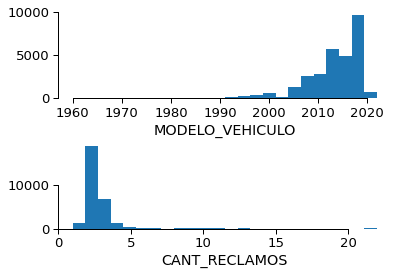

In [43]:
# Distribuciones de algunas columnas
numeric_columns = ["MODELO_VEHICULO", "CANT_RECLAMOS"]
sns.set_context("paper", font_scale=1.5)
_, axs = plt.subplots(nrows=len(numeric_columns))
for i, column in enumerate(numeric_columns):
    axs[i].hist(data[column], bins=24)
    axs[i].set_xlabel(column)
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
sns.despine(trim=True)
plt.subplots_adjust(hspace=0.5)
plt.show()

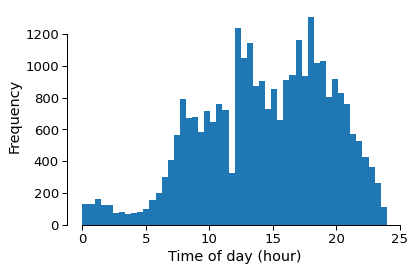

In [17]:
# Convertir HORA_SINI a un float con el momento del día
data["HORA_SINI"] = (
    pd.to_datetime(data["HORA_SINI"], format="%H:%M") - np.datetime64("1900-01-01 00:00:00")
) / np.timedelta64(1, "h") % 24
sns.set_context("paper", font_scale=1.5)
plt.hist(data["HORA_SINI"], bins="auto")
plt.ylabel("Frequency")
plt.xlabel("Time of day (hour)")
sns.despine(trim=True)
plt.show()

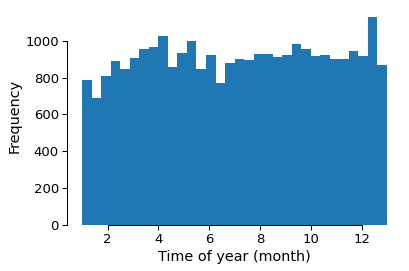

In [18]:
# Calcular momento en el año a partir de FECHA_SINI
data["FECHA_SINI_MES"] = (
    pd.to_datetime(data["FECHA_SINI"]) - np.datetime64("1900-01-01 00:00:00")
) / np.timedelta64(1, "M") % 12 + 1
sns.set_context("paper", font_scale=1.5)
plt.hist(data["FECHA_SINI_MES"], bins="auto")
plt.ylabel("Frequency")
plt.xlabel("Time of year (month)")
sns.despine(trim=True)
plt.show()

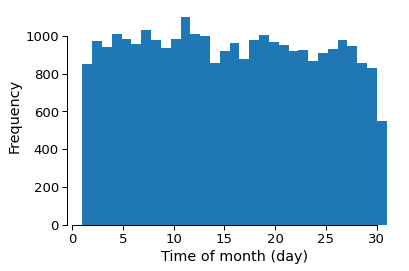

In [19]:
# Calcular día del mes a partir de FECHA_SINI
data["FECHA_SINI_DIA_MES"] = pd.to_datetime(data["FECHA_SINI"]).dt.day
sns.set_context("paper", font_scale=1.5)
plt.hist(data["FECHA_SINI_DIA_MES"], bins=31)
plt.ylabel("Frequency")
plt.xlabel("Time of month (day)")
sns.despine(trim=True)
plt.show()

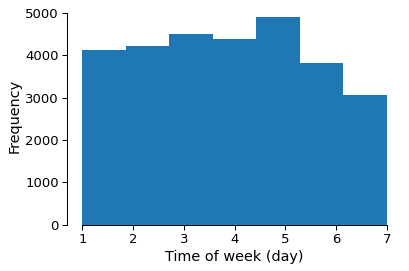

In [20]:
# Calcular día de la semana a partir de FECHA_SINI (Monday=1)
data["FECHA_SINI_DIA_SEMANA"] = pd.to_datetime(data["FECHA_SINI"]).dt.dayofweek + 1
sns.set_context("paper", font_scale=1.5)
plt.hist(data["FECHA_SINI_DIA_SEMANA"], bins=7)
plt.ylabel("Frequency")
plt.xlabel("Time of week (day)")
sns.despine(trim=True)
plt.show()

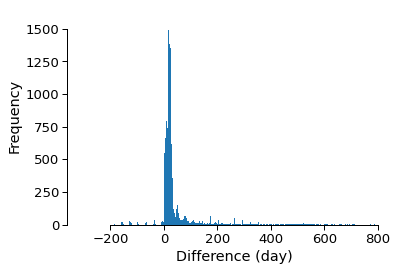

In [21]:
# Calcular la diferencia en días entre FECHA_PROCESO y FECHA_SINI
data["FECHA_PROCESO_DIF"] = (
    pd.to_datetime(data["FECHA_PROCESO"]) - pd.to_datetime(data["FECHA_SINI"])
) / np.timedelta64(1, "D")
sns.set_context("paper", font_scale=1.5)
plt.hist(data["FECHA_PROCESO_DIF"], bins="auto")
plt.ylabel("Frequency")
plt.xlabel("Difference (day)")
sns.despine(trim=True)
plt.show()

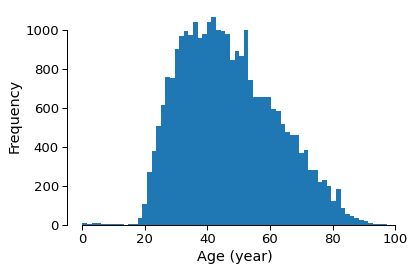

In [22]:
# Calcular edad del asegurado, tratando edad > 100 como missing
data["EDAD_ASEG"] = (
    np.datetime64("2022-01-01") - pd.to_datetime(data["FECHA_NAC_ASEG"])
) / np.timedelta64(1, 'Y')
data.loc[data["EDAD_ASEG"] > 100, "EDAD_ASEG"] = np.nan
sns.set_context("paper", font_scale=1.5)
plt.hist(data["EDAD_ASEG"], bins="auto")
plt.ylabel("Frequency")
plt.xlabel("Age (year)")
sns.despine(trim=True)
plt.show()

In [23]:
# Convertir el código postal a un distrito de mayor extensión, por ejemplo,
# utilizando una tabla para mapear código postal -> provincia
zip_codes_data = pd.read_csv(
    "codigos-postales.csv", sep=",", header=0
).astype("str").set_index("CP")
data["PROV_OCURRENCIA"] = data["COD_POST_OCURRENCIA"].astype("str").str[:4].map(
    zip_codes_data["Provincia"].to_dict()
)
del zip_codes_data
data["PROV_OCURRENCIA"].value_counts()

Buenos Aires           13520
Capital Federal         5552
Cordoba                 2050
Santa Fe                1255
Chaco                    911
Tucuman                  717
Salta                    580
Misiones                 544
Formosa                  416
Mendoza                  359
Entre Rios               278
La Pampa                 254
San Juan                 230
Catamarca                207
La Rioja                 178
Rio Negro                169
Jujuy                    163
Santiago Del Estero      150
Corrientes               150
San Luis                 149
Chubut                   130
Neuquen                  123
Santa Cruz                83
Tierra Del Fuego          17
Name: PROV_OCURRENCIA, dtype: int64

In [24]:
# Simplificar LUGAR_OCURRENCIA
places_dict = {
    "Avenida": ["avenida", "avda", "av ", "av."],
    "Acceso": ["acceso", "acc ", "acc.", "ac ", "ac.", "colec"],
    "Autopista": ["autopista", "autop ", "autop.", "au ", "au."],
    "Ruta": ["ruta", "ru ", "rut ", "ru.", "rut."]
}
lowercase_places = data["LUGAR_OCURRENCIA"].str.lower().copy()
data["LUGAR_OCURRENCIA"] = pd.Series("Otro", index=lowercase_places.index)
for place, search in places_dict.items():
    match = lowercase_places.str.contains("|".join(search)).fillna(False)
    data.loc[match, "LUGAR_OCURRENCIA"] = place
del lowercase_places, places_dict
data["LUGAR_OCURRENCIA"].value_counts()

Otro         15677
Avenida       8574
Ruta          1945
Acceso        1688
Autopista     1120
Name: LUGAR_OCURRENCIA, dtype: int64

In [30]:
# Convertir OCUPACION_ASEG a etiquetas
data["OCUPACION_ASEG"] = data["OCUPACION_ASEG"].fillna(0).astype(int).astype(str)
data["OCUPACION_ASEG"].value_counts().head(10)

5        11667
999       4115
99999     3057
44        2339
9999      1518
13         956
8          939
28         632
1          530
25         351
Name: OCUPACION_ASEG, dtype: int64

In [45]:
# Características de columnas categóricas
data.describe(include="object")

,TIPO_RECLAMO,LUGAR_OCURRENCIA,ESTADO_CIVIL,SEXO,OCUPACION_ASEG,TIPO_ADMINISTRACION,DESCRIP_HECHO,PROV_OCURRENCIA
count,29004,29004,28486,29004,29004,29004,29004,28185
unique,2,5,10,2,48,5,28627,24
top,NO TRANSPORTADO,Otro,CA,M,5,A,APERTURA DE OFICIO// SIN DENUNCIA \r\n,Buenos Aires
freq,27452,15677,13580,21113,11667,11569,73,13520


In [31]:
# Eliminar atributos que no se usen
data = data.drop(columns=[
    "id_reclamo_evento", "id_reclamo",
    "TIPO_ADMINISTRACION_FIN", "FECHA_PROCESO", "FECHA_SINI", "FECHA_NAC_ASEG", "COD_POST_OCURRENCIA", # Fueron transformadas a otras columnas
    "LATITUD", "LONGITUD", # Tienen demasiados missing values
])

In [49]:
# Veamos algunas columnas categóricas
show_categorical_columns = data.columns[data.dtypes=="object"]
show_categorical_columns = show_categorical_columns[data[show_categorical_columns].nunique() < 20]
data_cuentas = pd.crosstab(**data[show_categorical_columns].melt(var_name="index", value_name="columns"))
data_cuentas = data_cuentas.reindex(show_categorical_columns)
for i in data_cuentas.index:
    """Sort row i by column values"""
    data_cuentas = data_cuentas[data_cuentas.columns[data_cuentas.loc[i].argsort()]]
fig = px.bar(
    data_cuentas,
    x = data_cuentas.index,
    y = data_cuentas.columns,
    color_discrete_sequence=px.colors.qualitative.T10
)
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Categorical Columns",
    yaxis_title="Count",
    legend_title_text="Possible values",
    font_color="black",
    plot_bgcolor="white",
)
fig.show()

Benchmark

In [29]:
(data.TIPO_ADMINISTRACION.map(target_dict) == data.target).mean()

0.9048751896290167

Nuestro modelo necesita una precisión mayor al 90.5%, para ser considerado mejor que este benchmark.

---
### Conjuntos de entrenamiento y de prueba

In [33]:
# Dividir los datos en conjuntos de train y test
[
    idx_train, idx_test,
    X_train, X_test,
    y_train, y_test
] = train_test_split(
    data.index,
    data.drop(columns=["target"]),
    data["target"],
    test_size=0.2,
    random_state=42
)

In [ ]:
# Named Entity Recognition, Tokenizer, SpellChecker y Stemmer
ner = Pipeline(lang="es", processors="tokenize, ner", verbose=False, use_gpu=False) # Lo estoy corriendo en una laptop sin GPU, lo podría correr en Google Colab para aprovechar su GPU
tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
spell = SpellChecker(distance=3, language="es")
stemmer = SnowballStemmer("spanish")

In [78]:
# Pipeline de procesamiento de texto
def nlp_pipeline(words, ner, tokenizer, spell, stemmer):
    """Procesamiento de texto."""
    # Remover Named Entities (nombres propios de lugares, personas, organizaciones y miscelánea)
    i = 0
    new_words = ""
    for entity in ner(words).ents:
        new_words += words[i:entity.start_char]
        i = entity.end_char
    new_words += words[i:]

    # Cambiar a minúsculas
    new_words = new_words.lower()

    # Remover números, puntuación y separar en palabras
    new_words = tokenizer.tokenize(new_words)

    # Corrección ortográfica
    new_words = [word if word in spell else spell.correction(word) for word in new_words]

    # Remover stop words
    new_words = [word for word in new_words if word not in set(stopwords.words("spanish"))]

    # Obtener stems
    new_words = [stemmer.stem(word) for word in new_words]

    return new_words

In [79]:
from nltk import everygrams
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

In [84]:
import multiprocessing as mp
mp.cpu_count()

8

In [80]:
# Calcular ngrams
def ngram_features(words, n):
    """Retorna ngrams observados en words, desde orden 1 hasta n."""
    return {ngram: True for ngram in everygrams(words, 1, n)}

In [82]:
ejemplos = data[["DESCRIP_HECHO", "target"]].sample(n=100, random_state=42)

n_ngram = 5

nlp = lambda x: ngram_features(nlp_pipeline(x, ner, tokenizer, spell, stemmer), n_ngram)
label_dict = {0: "negative", 1: "positive"}

# Tengo que crear los ngram features para las muestra de train y test
# Tienen la forma
# features.append((create_ngram_features(words, n), "positive"))

ngrams_label = ejemplos.copy()
ngrams_label["DESCRIP_HECHO"] = ngrams_label["DESCRIP_HECHO"].map(nlp)
ngrams_label_tuples = []
for i in ngrams_label.index:
    ngrams_label_tuples.append(
        (
            nlp(ngrams_label["DESCRIP_HECHO"][i]),
            label_dict[ngrams_label["target"][i]]
        )
    )

# classifier = NaiveBayesClassifier.train(train_set)

# accuracy = nltk.classify.util.accuracy(classifier, test_set)
# print('1-gram to', str(n_ngram)+'-gram accuracy:', accuracy)

In [100]:
ngrams_label_tuples = [
    (ngrams_label.DESCRIP_HECHO[i], label_dict[ngrams_label["target"][i]])
    for i in ngrams_label.index
]

In [107]:
classifier = NaiveBayesClassifier.train(ngrams_label_tuples[:95])

In [108]:
accuracy(classifier, ngrams_label_tuples[95:])

0.8

---
### Implementación de modelos de clasificación

In [11]:
# Preprocesamiento
one_hot_preprocessor = ColumnTransformer([
    ("one-hot-encoder", OneHotEncoder(), categorical_columns),
    ("robust-scaler", RobustScaler(), numeric_columns),
])
ordinal_preprocessor = ColumnTransformer([
    ("ordinal-encoder", OrdinalEncoder(), categorical_columns),
    ("identity", "passthrough", numeric_columns)
])

In [12]:
# Modelo Regresión Logística
model_lr = make_pipeline(one_hot_preprocessor, LogisticRegression(max_iter=1000))
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

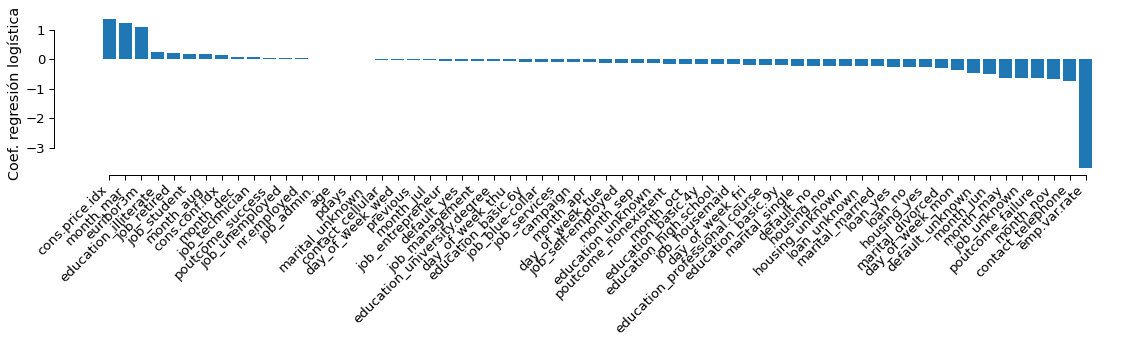

In [13]:
# Coeficientes Regresión Logística
plt.figure(figsize=(19.5, 3))
one_hot_categories = OneHotEncoder().fit(X_train[categorical_columns]).get_feature_names_out(categorical_columns)
labels_lr = np.concatenate([one_hot_categories, numeric_columns])
coefs_lr = model_lr._final_estimator.coef_[0]
sort_lr = np.argsort(coefs_lr)[::-1]
plt.bar(
    labels_lr[sort_lr],
    coefs_lr[sort_lr]
    )
plt.xticks(rotation=45, ha="right")
plt.ylabel("Coef. regresión logística")
sns.despine(trim=True)
plt.show()
plt.close()

In [14]:
# Modelo Gradient Boosting
model_gb = make_pipeline(ordinal_preprocessor, GradientBoostingClassifier(min_samples_split=300, min_samples_leaf=100))
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
y_prob_gb = model_gb.predict_proba(X_test)[:, 1]

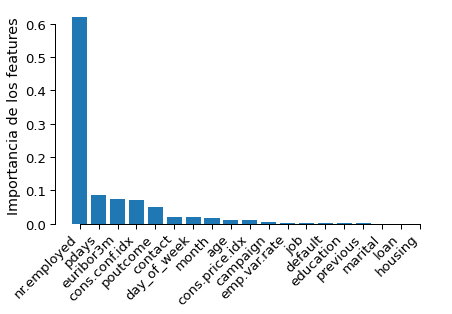

In [15]:
# Importancia de los features en Gradiant Boosting
plt.figure(figsize=(7, 4))
sns.set_context("paper", font_scale=1.5)
labels_gb = np.concatenate([categorical_columns, numeric_columns])
importance_gb = model_gb._final_estimator.feature_importances_
sort_gb = np.argsort(importance_gb)[::-1]
plt.bar(
    labels_gb[sort_gb],
    importance_gb[sort_gb]
    )
plt.xticks(rotation=45, ha="right")
plt.ylabel("Importancia de los features")
sns.despine(trim=True)
plt.show()
plt.close()

---
### Selección de modelo

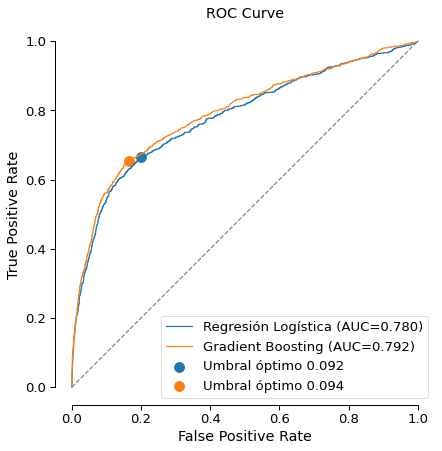

In [16]:
plt.figure(figsize=(7, 7))
sns.set_context("paper", font_scale=1.5)
for y_prob, name in zip(
    [y_prob_lr, y_prob_gb],
    ["Regresión Logística", "Gradient Boosting"]
):
    fpr, tpr, thres = roc_curve(y_test, y_prob)
    plt.plot(
        fpr,
        tpr,
        label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.3f})"
    )
    gmeans = np.sqrt(tpr * (1 - fpr))
    opt_idx = gmeans.argmax()
    plt.scatter(
        fpr[opt_idx],
        tpr[opt_idx],
        s=100,
        label=f"Umbral óptimo {thres[opt_idx]:.3f}",
    )
plt.plot([0, 1], [0, 1], c="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.gca().set_aspect("equal", adjustable="box")
sns.despine(trim=True)
plt.show()

---
### Evaluación del modelo seleccionado

In [17]:
# Función para graficar la matriz de confusión de un modelo
def plot_confusion_matrix(matrix, title):
    """Heatmap de la matriz de confusión de un modelo de clasificación."""
    plt.figure(figsize=(7, 7))
    sns.set_context("paper", font_scale=1.5)
    ax = sns.heatmap(
        matrix / np.sum(matrix) * 100,
        annot=True, fmt=".2f", cmap="Blues",
        vmin=0, vmax=100
    )
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Actual Values")
    ax.xaxis.set_ticklabels(["False", "True"])
    ax.yaxis.set_ticklabels(["False", "True"])
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(length=0)
    cbar.set_label("Probabilidad (%)")
    plt.title(title)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.show()
    plt.close()

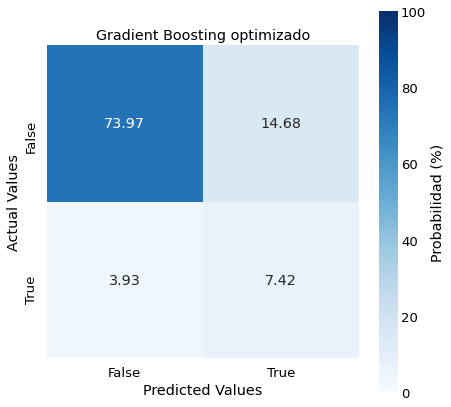

In [18]:
# Veamos la matriz de confusion del modelo seleccionado
# Gradient Boost, con umbral óptimo
fpr, tpr, thres = roc_curve(y_test, y_prob_gb)
gmeans = np.sqrt(tpr * (1 - fpr))
opt_idx = gmeans.argmax()
opt_theta = thres[opt_idx]
y_pred_opt = (y_prob_gb > opt_theta).astype(int)
confusion_opt = confusion_matrix(y_test, y_pred_opt)
plot_confusion_matrix(confusion_opt, "Gradient Boosting optimizado")

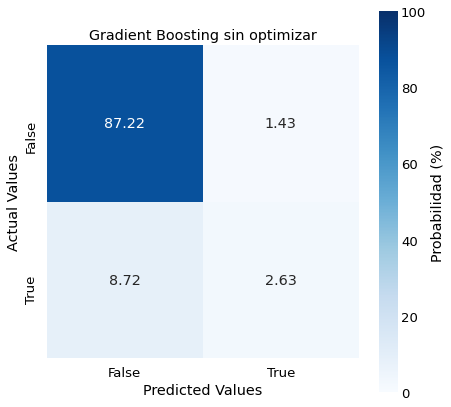

In [19]:
# Comparemos con la matriz de confusión del modelo sin optimizar
confusion_gb = confusion_matrix(y_test, y_pred_gb)
plot_confusion_matrix(confusion_gb, "Gradient Boosting sin optimizar")